In [1]:
import tweepy

# import twitter authentication module
from tweepy import OAuthHandler

# import the python package to handle datetime
import datetime

import csv
import pandas as pd
import numpy as np
import re
from unidecode import unidecode

In [2]:
tweepy.__version__

'3.5.0'

- **REST API:** access to core data about individual users, update and retrieve timelines, status data.  
Limit: 3240 tweets
- **Streaming API:** receiving real time feed for access large scale tweet stream. Can filter with keywords, user lists, locations.

In [4]:
consumer_key = 'replace your own account consumer_key'
consumer_secret = 'replace your own account consumer_secret'
access_token = 'replace your own account access_token'
access_secret = 'replace your own account access_secret'

In [10]:
#Twitter requires all requests to use OAuth for authentication. 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

### Finding Tweets based on a Query

In [88]:
query='social network'

message,favorite_count,retweet_count,created_at,user_name,favourites_count,description,friends_count,followers_count,source,hashtags=[],[],[],[],[],[],[],[],[],[],[]
#lang: Restricts tweets to the given language
#since='yyyy-mm-dd',until='yyyy-mm-dd': Returns tweets created between the given date. 
for status in tweepy.Cursor(api.search,q=query,lang='en',tweet_mode='extended').items(500):
    message.append(unidecode(status.full_text))
    favorite_count.append(status.favorite_count)
    retweet_count.append(status.retweet_count)
    created_at.append(status.created_at)
    source.append(status.source)
    user_name.append(status.user.screen_name)
    favourites_count.append(status.user.favourites_count)
    description.append(status.user.description)
    friends_count.append(status.user.friends_count)
    followers_count.append(status.user.followers_count)
    hashtag = []
    hashtags_data = status.entities.get('hashtags', None)
    if(hashtags_data != None):
        for i in range(len(hashtags_data)):
            hashtag.append(unidecode(hashtags_data[i]['text']))
    hashtags.append(', '.join(hashtag))
    
df=pd.DataFrame({'Message':message,
                'Tweet Favorite Count':favorite_count,
                'Retweet Count':retweet_count,
                'Created At':created_at,
                'Username':user_name,
                'Likes':favourites_count,
                'User Description':description,
                'Following':friends_count,
                'Followers':followers_count,
                'Source':source,
                'Hashtags':hashtags})

In [91]:
df.head()

,Created At,Followers,Following,Hashtags,Likes,Message,Retweet Count,Source,Tweet Favorite Count,User Description,Username
0,2018-11-20 17:38:59,518,197,"facebookoutage, facebookdown, instagramoutage,...",1901,"I would post this to Facebook, but....\n#faceb...",0,HubSpot,0,Delivering tech guidance and managed services ...,SagissIT
1,2018-11-20 17:38:35,2522,3002,FacebookDown,1857,RT @iSocialFanz: #FacebookDown and everyone ru...,21,Twitter for iPhone,0,Content & Social Media Manager 💬 @Fepemfr ~~ #...,Webyseb
2,2018-11-20 17:38:06,82,219,,21515,"RT @NatGeo: This year, researchers found a vas...",335,Twitter Web Client,0,"Just Maths, Maths, Maths...",gangeticus
3,2018-11-20 17:38:02,1439,211,socialmedia,962,RT @socialmedia2day: Change is constant at The...,6,Sprout Social,0,Director of DPOM - A Google Premier Partner Ag...,BrettDixon
4,2018-11-20 17:37:50,1,111,,0,"Hi, I am a newbie in the Tweet social network....",0,Twitter Web Client,0,"I help goal-driven individuals find balance, m...",StegallRuby


In [92]:
df.shape

(500, 11)

- **api.search**
The search index has a 7-day limit.  
- **result_type**  
Specifies what type of search results you would prefer to receive. The current default is “mixed.” Valid values include:
 - mixed : Include both popular and real time results in the response.
 - recent : return only the most recent results in the response
 - popular : return only the most popular results in the response.
- **wait_on_rate_limit=True**. This will make the rest of the code obey the rate limit.

In [99]:
for status in tweepy.Cursor(api.search,
                       q="Venom",
                       #since='2018-10-11',
                       until='2018-11-16',
                       result_type='popular',
                       lang="en").items(10):
    print('Tweet by: @' + str(status.created_at))

Tweet by: @2018-11-12 02:18:12
Tweet by: @2018-11-14 21:07:30
Tweet by: @2018-11-13 15:32:35
Tweet by: @2018-11-10 03:24:07
Tweet by: @2018-11-11 17:20:07
Tweet by: @2018-11-14 08:34:29
Tweet by: @2018-11-12 20:30:24
Tweet by: @2018-11-11 17:00:53
Tweet by: @2018-11-11 17:39:07
Tweet by: @2018-11-11 16:51:21


In [93]:
#this file will open in Excel decodes correctly
df.to_csv("sn_tweets.csv",encoding='utf_8_sig',index=False)

In [100]:
#Convert timezone

from datetime import timedelta
#df['Created At']=df['Created At'].dt.tz_localize('GMT').dt.tz_convert('America/New_York').dt.tz_localize(None)
df['Created At']=df['Created At']- timedelta(hours=5)

In [101]:
df.head(10)

,Created At,Followers,Following,Hashtags,Likes,Message,Retweet Count,Source,Tweet Favorite Count,User Description,Username
0,2018-11-20 12:38:59,518,197,"facebookoutage, facebookdown, instagramoutage,...",1901,"I would post this to Facebook, but....\n#faceb...",0,HubSpot,0,Delivering tech guidance and managed services ...,SagissIT
1,2018-11-20 12:38:35,2522,3002,FacebookDown,1857,RT @iSocialFanz: #FacebookDown and everyone ru...,21,Twitter for iPhone,0,Content & Social Media Manager 💬 @Fepemfr ~~ #...,Webyseb
2,2018-11-20 12:38:06,82,219,,21515,"RT @NatGeo: This year, researchers found a vas...",335,Twitter Web Client,0,"Just Maths, Maths, Maths...",gangeticus
3,2018-11-20 12:38:02,1439,211,socialmedia,962,RT @socialmedia2day: Change is constant at The...,6,Sprout Social,0,Director of DPOM - A Google Premier Partner Ag...,BrettDixon
4,2018-11-20 12:37:50,1,111,,0,"Hi, I am a newbie in the Tweet social network....",0,Twitter Web Client,0,"I help goal-driven individuals find balance, m...",StegallRuby
5,2018-11-20 12:37:41,4501,4997,,79419,RT @BeauWillimon: Facebook is not a social net...,391,Twitter for iPhone,0,"The World is my country, all mankind are my br...",dazyjane410
6,2018-11-20 12:37:25,1260,2311,,3041,RT @spilleth_over: Applications are open for t...,1,Twitter for Android,0,"Architect, urbanist, tutor @UEL, Cyclist. IMPO...",RolandKarthaus
7,2018-11-20 12:37:11,30239,17973,"BlackFriday, HDub4Cricket, sponsored, ad, stsa...",5600,Make the switch like ya boy @HollywoodDub this...,0,Twitter for iPhone,0,Radio/TV Personality & VoiceOver Talent and Br...,HollywoodDub
8,2018-11-20 12:36:43,10911,10517,"TheResistance, ImpeachTrump, NotMyPresident",30840,Facebook and Instagram are down for some users...,0,dlvr.it,0,Retired IT Tech Net Security. The NEWS is the ...,cahulaan
9,2018-11-20 12:36:23,72,687,,1602,RT @NeerajT4: @naval Evolution of Networks:\n\...,4,Twitter for Android,0,,AsanteBoadu3


### tweets' length

In [16]:
import re
line = " I am having a very nice day."
count = len(re.findall(r'\w+', line))
print (count)

7


In [102]:
df['len']=df.apply(lambda x: len(re.findall(r'\w+', x['Message'])),axis=1)

In [103]:
df.head()

,Created At,Followers,Following,Hashtags,Likes,Message,Retweet Count,Source,Tweet Favorite Count,User Description,Username,len
0,2018-11-20 12:38:59,518,197,"facebookoutage, facebookdown, instagramoutage,...",1901,"I would post this to Facebook, but....\n#faceb...",0,HubSpot,0,Delivering tech guidance and managed services ...,SagissIT,25
1,2018-11-20 12:38:35,2522,3002,FacebookDown,1857,RT @iSocialFanz: #FacebookDown and everyone ru...,21,Twitter for iPhone,0,Content & Social Media Manager 💬 @Fepemfr ~~ #...,Webyseb,23
2,2018-11-20 12:38:06,82,219,,21515,"RT @NatGeo: This year, researchers found a vas...",335,Twitter Web Client,0,"Just Maths, Maths, Maths...",gangeticus,23
3,2018-11-20 12:38:02,1439,211,socialmedia,962,RT @socialmedia2day: Change is constant at The...,6,Sprout Social,0,Director of DPOM - A Google Premier Partner Ag...,BrettDixon,21
4,2018-11-20 12:37:50,1,111,,0,"Hi, I am a newbie in the Tweet social network....",0,Twitter Web Client,0,"I help goal-driven individuals find balance, m...",StegallRuby,21


In [105]:
mean = np.mean(df['len'])

print("The length's average in tweets: ",mean)

The length's average in tweets:  24.138


### Find the tweet with the max favorites or retweet

In [106]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(df['Likes'])
rt_max  = np.max(df['Retweet Count'])

fav = df[df['Likes'] == fav_max].index[0]
rt  = df[df['Retweet Count'] == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(df['Message'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(df['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(df['Message'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(df['len'][rt]))

The tweet with more likes is: 
RT @Charlesfrize: Blogging Advice - #Blogging On A Social Network #FrizeMedia #DigitalMarketing https://t.co/pdEQrVsbf5 via @Charlesfrize
Number of likes: 293543
17 characters.

The tweet with more retweets is: 
RT @IBM: How do antelope help protect endangered rhino from poachers? IoT and IBM Cloud. https://t.co/Nvnit1qiVj
Number of retweets: 2588
19 characters.



### Analyze the tweets' source

In [107]:
source_count=pd.DataFrame(df['Source'].value_counts())
source_count.reset_index(inplace=True)
source_count

,index,Source
0,Twitter Web Client,149
1,Twitter for iPhone,116
2,Twitter for Android,91
3,Twitter Lite,21
4,IFTTT,16
5,Hootsuite Inc.,15
6,TweetDeck,11
7,Twitter for iPad,11
8,Buffer,8
9,dlvr.it,6


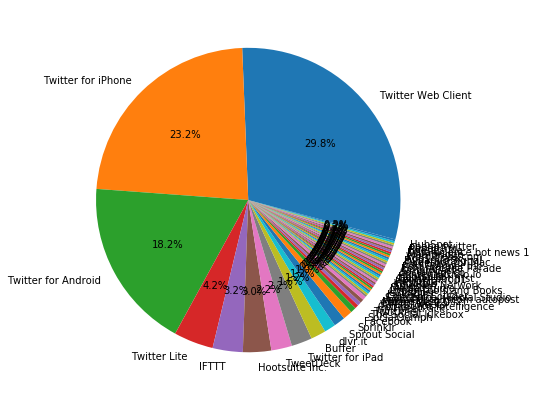

In [118]:
plt.figure(figsize=(7, 7));
plt.pie(
    # using data total)arrests
    source_count['Source'],
    # with the labels being officer names
    labels=source_count['index'],
    # with the start angle at 345%
    startangle=345,
    # with the percent listed as a fraction
    autopct='%1.1f%%');
plt.show();

### Text Mining

In [120]:
#re library, which is used to work with regular expressions.
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|(&[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    #text = text.lower()
    return text

In [125]:
text='I would post this to Facebook, but....\n#facebookoutage #facebookdown #instagramoutage #instagramdown\n\n Facebook down: Users report issues loading social network https://t.co/aNJexZ9z6G by @syracusedotcom'
clean_tweet(text)

'I would post this to Facebook but facebookoutage facebookdown instagramoutage instagramdown Facebook down Users report issues loading social network by'

In [126]:
df['clean_tweet']=df.apply(lambda x: clean_tweet(x['Message']),axis=1)

In [127]:
df.head()

,Created At,Followers,Following,Hashtags,Likes,Message,Retweet Count,Source,Tweet Favorite Count,User Description,Username,len,clean_tweet
0,2018-11-20 12:38:59,518,197,"facebookoutage, facebookdown, instagramoutage,...",1901,"I would post this to Facebook, but....\n#faceb...",0,HubSpot,0,Delivering tech guidance and managed services ...,SagissIT,25,I would post this to Facebook but facebookouta...
1,2018-11-20 12:38:35,2522,3002,FacebookDown,1857,RT @iSocialFanz: #FacebookDown and everyone ru...,21,Twitter for iPhone,0,Content & Social Media Manager 💬 @Fepemfr ~~ #...,Webyseb,23,RT FacebookDown and everyone runs to twitter i...
2,2018-11-20 12:38:06,82,219,,21515,"RT @NatGeo: This year, researchers found a vas...",335,Twitter Web Client,0,"Just Maths, Maths, Maths...",gangeticus,23,RT This year researchers found a vast network ...
3,2018-11-20 12:38:02,1439,211,socialmedia,962,RT @socialmedia2day: Change is constant at The...,6,Sprout Social,0,Director of DPOM - A Google Premier Partner Ag...,BrettDixon,21,RT Change is constant at The Social Network ch...
4,2018-11-20 12:37:50,1,111,,0,"Hi, I am a newbie in the Tweet social network....",0,Twitter Web Client,0,"I help goal-driven individuals find balance, m...",StegallRuby,21,Hi I am a newbie in the Tweet social network I...


### wordcloud

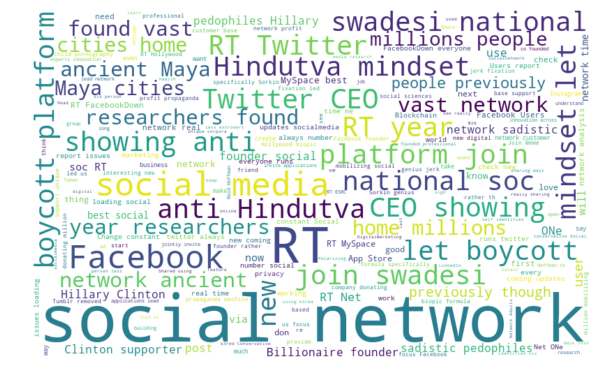

In [138]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

all_words = ' '.join([text for text in df['clean_tweet']])

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate(all_words)

plt.figure(figsize=(10, 7));
plt.imshow(wordcloud, interpolation="bilinear");
plt.axis('off');
plt.show();

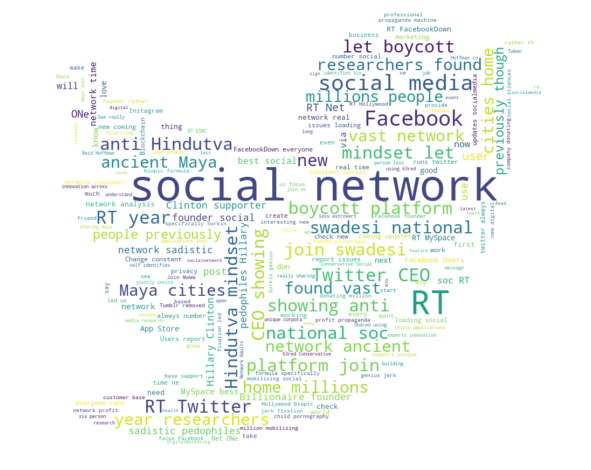

In [175]:
from PIL import Image

mask = np.array(Image.open('twitter_mask.png'))

wordcloud = WordCloud(mask=mask,  background_color='white', stopwords=STOPWORDS)
wordcloud.generate(all_words)
plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
plt.imshow(wordcloud, interpolation="bilinear");

plt.axis('off');
plt.show();                                    

# Sentiment Analysis

### Define a function "**sentiment_analysis**" as follows:
   - takes a string, a list of positive words, and a list of negative words as inputs. Assume the lists are read from positive-words.txt and negative-words.txt outside of this function.
   - tokenize the string using NLTK word tokenizer
    - Tokenization: the process of breaking a stream of textual content up into words, terms, symbols, or some other meaningful elements called tokens.
   - counts positive words and negative words in the tokens using the positive/negative words lists. The final positive/negative words are defined as follows:
     - Positive words:
       * a positive word not preceded by a negation word (i.e. not, n't, no, cannot, neither, nor, too)
       * a negative word preceded by a negation word
     - Negative words:
       * a negative word not preceded by a negation word
       * a positive word preceded by a negation word
   - determines the sentiment of the string as follows:
     - 1: number of positive words > number of negative words
     - -1: number of positive words <= number of negative words
   - returns the sentiment 

##  NLTK installation
 1. Install NLTK package using: pip install nltk 
 2. Open your python editor (Jupyter Notebook, Spyder etc.) and type the following comands below. Select "all packages" to install data included in NLTK, including corpora and books. It may take a few minutes to download all data

In [ ]:
import nltk
nltk.download()

In [153]:
import nltk


with open("positive-words.txt",'r') as f:
        positive_words=[line.strip() for line in f]
        
with open("negative-words.txt",'r') as f:
        negative_words=[line.strip() for line in f]

In [154]:
def sentiment_analysis(text, positive_words, negative_words):
    
    sentiment=None
    
    tokens = nltk.word_tokenize(text)
    positive_tokens=[]
    negative_tokens=[]
    negations=['not', 'too', 'n\'t', 'no', 'cannot', 'neither','nor']
    for idx, token in enumerate(tokens):
        if token in positive_words:
            if idx>0:
                if tokens[idx-1] not in negations:
                    positive_tokens.append(token)
                elif tokens[idx-1] in negations:
                    negative_tokens.append(token)
            else:
                positive_tokens.append(token)
    
        elif token in negative_words:
            if idx>0:
                if tokens[idx-1] not in negations:
                    negative_tokens.append(token)
                elif tokens[idx-1] in negations:
                    positive_tokens.append(token)
            else:
                negative_tokens.append(token)
    if len(positive_tokens)>len(negative_tokens):
        sentiment=1
    else:
        sentiment=-1

    return sentiment

In [164]:
text="this is a breathtaking ambitious movie"
sentiment=sentiment_analysis(text, positive_words, negative_words)
print(sentiment)

1


### nltk method

In [169]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

text='The food is good and the atmosphere is nice'
ss = sid.polarity_scores(text)
print(ss)

{'neg': 0.0, 'neu': 0.551, 'pos': 0.449, 'compound': 0.6908}


/Users/jiahuibi/anaconda/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [174]:
sentences = ["VADER is smart, handsome, and funny.", # positive sentence example
 "VADER is smart, handsome, and funny!", # punctuation emphasis handled correctly (sentiment intensity adjusted)
 "VADER is very smart, handsome, and funny.",  # booster words handled correctly (sentiment intensity adjusted)
 "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
 "VADER is VERY SMART, handsome, and FUNNY!!!",# combination of signals - VADER appropriately adjusts intensity
 "VADER is VERY SMART, really handsome, and INCREDIBLY FUNNY!!!",# booster words & punctuation make this close to ceiling for score
 "The book was good.",         # positive sentence
 "The book was kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
 "The plot was good, but the characters \
 are uncompelling and the dialog is not great.", # mixed negation sentence
 "A really bad, horrible book.",       # negative sentence with booster words
 "At least it isn't a horrible book.", # negated negative sentence with contraction
 ":) and :D"     # emoticons handled
 ]

# initalize analyzer

sid = SentimentIntensityAnalyzer()

for sentence in sentences:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]))
    print("\n")

VADER is smart, handsome, and funny.
compound: 0.8316, 
neg: 0.0, 
neu: 0.254, 
pos: 0.746, 


VADER is smart, handsome, and funny!
compound: 0.8439, 
neg: 0.0, 
neu: 0.248, 
pos: 0.752, 


VADER is very smart, handsome, and funny.
compound: 0.8545, 
neg: 0.0, 
neu: 0.299, 
pos: 0.701, 


VADER is VERY SMART, handsome, and FUNNY.
compound: 0.9227, 
neg: 0.0, 
neu: 0.246, 
pos: 0.754, 


VADER is VERY SMART, handsome, and FUNNY!!!
compound: 0.9342, 
neg: 0.0, 
neu: 0.233, 
pos: 0.767, 


VADER is VERY SMART, really handsome, and INCREDIBLY FUNNY!!!
compound: 0.9469, 
neg: 0.0, 
neu: 0.294, 
pos: 0.706, 


The book was good.
compound: 0.4404, 
neg: 0.0, 
neu: 0.508, 
pos: 0.492, 


The book was kind of good.
compound: 0.3832, 
neg: 0.0, 
neu: 0.657, 
pos: 0.343, 


The plot was good, but the characters  are uncompelling and the dialog is not great.
compound: -0.7042, 
neg: 0.327, 
neu: 0.579, 
pos: 0.094, 


A really bad, horrible book.
compound: -0.8211, 
neg: 0.791, 
neu: 0.209, 
pos: 

In [172]:
df['neg']= df.apply(lambda x: sid.polarity_scores(x['clean_tweet'])['neg'],axis=1)
df['neu']= df.apply(lambda x: sid.polarity_scores(x['clean_tweet'])['neu'],axis=1)
df['pos']= df.apply(lambda x: sid.polarity_scores(x['clean_tweet'])['pos'],axis=1)
df['compound']= df.apply(lambda x: sid.polarity_scores(x['clean_tweet'])['compound'],axis=1)

In [173]:
df.head()

,Created At,Followers,Following,Hashtags,Likes,Message,Retweet Count,Source,Tweet Favorite Count,User Description,Username,len,clean_tweet,neg,neu,pos,compound
0,2018-11-20 12:38:59,518,197,"facebookoutage, facebookdown, instagramoutage,...",1901,"I would post this to Facebook, but....\n#faceb...",0,HubSpot,0,Delivering tech guidance and managed services ...,SagissIT,25,I would post this to Facebook but facebookouta...,0.0,1.000,0.000,0.0000
1,2018-11-20 12:38:35,2522,3002,FacebookDown,1857,RT @iSocialFanz: #FacebookDown and everyone ru...,21,Twitter for iPhone,0,Content & Social Media Manager 💬 @Fepemfr ~~ #...,Webyseb,23,RT FacebookDown and everyone runs to twitter i...,0.0,0.936,0.064,0.0772
2,2018-11-20 12:38:06,82,219,,21515,"RT @NatGeo: This year, researchers found a vas...",335,Twitter Web Client,0,"Just Maths, Maths, Maths...",gangeticus,23,RT This year researchers found a vast network ...,0.0,1.000,0.000,0.0000
3,2018-11-20 12:38:02,1439,211,socialmedia,962,RT @socialmedia2day: Change is constant at The...,6,Sprout Social,0,Director of DPOM - A Google Premier Partner Ag...,BrettDixon,21,RT Change is constant at The Social Network ch...,0.0,1.000,0.000,0.0000
4,2018-11-20 12:37:50,1,111,,0,"Hi, I am a newbie in the Tweet social network....",0,Twitter Web Client,0,"I help goal-driven individuals find balance, m...",StegallRuby,21,Hi I am a newbie in the Tweet social network I...,0.0,0.741,0.259,0.4939


In [177]:
# Exercise 6.1. NMF transformation

from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=20, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['clean_tweet'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print(tfidf_feature_names[0:10])
print(tfidf.shape)

X_train, X_test = train_test_split(tfidf, test_size=0.1, random_state=0)

no_topics = 4

# Run NMF
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html
# init: ‘nndsvd’: Nonnegative Double Singular Value Decomposition (NNDSVD) better for sparseness
# alpha: regularization

nmf = NMF(n_components=no_topics, \
          random_state=1, alpha=0.01, init='nndsvd').fit(X_train)

['ancient', 'anti', 'best', 'boycott', 'business', 'ceo', 'cities', 'facebook', 'facebookdown', 'founder']
(500, 36)


In [178]:
# Exercise 6.2. Get topic words

num_top_words=20

# lda.components_ returns a KxN matrix
# for word distribution in each topic.
# Each row consists of 
# probability (counts) of each word in the feature space

for topic_idx, topic in enumerate(nmf.components_):
    print ("Topic %d:" % (topic_idx))
    # print out top 20 words per topic 
    words=[(tfidf_feature_names[i],topic[i]) \
           for i in topic.argsort()[::-1][0:num_top_words]]
    print(words)
    print("\n")

Topic 0:
[('social', 2.4961785951925797), ('network', 2.3586069060002868), ('new', 0.28540321219910636), ('media', 0.22548194558858733), ('news', 0.1322745464300143), ('join', 0.12758271708602822), ('time', 0.09327173890677587), ('facebookdown', 0.09171366462251945), ('best', 0.08858322414511587), ('twitter', 0.07421713477385061), ('people', 0.06591922043138163), ('users', 0.0598347944172624), ('let', 0.014473065008821786), ('business', 0.006465288450666395), ('platform', 0.004219082118568619), ('founder', 0.0007723307518140177), ('home', 0.0), ('cities', 0.0), ('facebook', 0.0), ('ceo', 0.0)]


Topic 1:
[('rt', 2.759288467341425), ('founder', 0.22340613786790137), ('business', 0.18358254358759316), ('join', 0.17203653538543706), ('time', 0.13057218713748295), ('twitter', 0.13046253925619022), ('new', 0.1292961412661832), ('national', 0.09080872235490721), ('platform', 0.0897818005723449), ('ceo', 0.08024420858884798), ('best', 0.07900948979169681), ('swadesi', 0.0663633006684092), ('a